# STEP 1: Load and Inspect the Data

## 1. Import the necessary libraries

In [2]:
import pandas as pd

## 2. Load the datasets

In [5]:
train_df = pd.read_csv(r"D:\ANURAG KUMAR\Project\Data Analysis\Project 06- Predict Titanic Survivors\train.csv")
test_df = pd.read_csv(r"D:\ANURAG KUMAR\Project\Data Analysis\Project 06- Predict Titanic Survivors\test.csv")

## 3. Check the shape of the datasets

In [8]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (891, 12)
Test shape: (418, 11)


## 4. Peek at the first few rows

In [11]:
print("\nTrain Data Sample:")
print(train_df.head())


Train Data Sample:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

## 5. Check for data types and missing values

In [16]:
print("\nMissing Values in Train:")
print(train_df.isnull().sum())

print("\nMissing Values in Test:")
print(test_df.isnull().sum())


Missing Values in Train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<hr>

# STEP 2: Data Cleaning & Preprocessing

## 1. Drop 'Cabin' column

In [29]:
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

## 2. Fill missing 'Age' with median

In [32]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

C:\Users\anubh\AppData\Local\Temp\ipykernel_11532\2703274470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\anubh\AppData\Local\Temp\ipykernel_11532\2703274470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

## 3. Fill missing 'Embarked' in train with mode

In [35]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

C:\Users\anubh\AppData\Local\Temp\ipykernel_11532\1613448763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


## 4. Fill missing 'Fare' in test with median

In [38]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\anubh\AppData\Local\Temp\ipykernel_11532\4271572204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


<hr>

# STEP 3: Feature Engineering

## 1. Convert 'Sex' to numeric

In [44]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

## 2. Convert 'Embarked' to numeric using one-hot encoding

In [47]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

## 3. Extract 'Title' from the Name

In [52]:
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

## Replace rare titles with 'Rare' and standardize

In [55]:
for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
    df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})
    df['Title'].fillna(4, inplace=True)

C:\Users\anubh\AppData\Local\Temp\ipykernel_11532\1019662174.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].fillna(4, inplace=True)
C:\Users\anubh\AppData\Local\Temp\ipykernel_11532\1019662174.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

## 4. Create 'FamilySize' feature

In [58]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

## 5. Drop irrelevant columns

In [61]:
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

<hr>

# STEP 4: Model Building & Training

### <b>🧠 First Model: Logistic Regression</b>

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'FamilySize',
            'Embarked_Q', 'Embarked_S']  # all numerical now

X = train_df[features]
y = train_df['Survived']

# 2. Split train/validation sets (for evaluation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Predict on validation set
y_pred = model.predict(X_val)

# 5. Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Logistic Regression Accuracy: 0.7821229050279329

Confusion Matrix:
 [[86 19]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### <b>🧠 Second Model: Random Forest</b>

In [122]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train it on training data
rf_model.fit(X_train, y_train)

# 3. Predict on validation set
y_pred_rf = rf_model.predict(X_val)

# 4. Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

Random Forest Accuracy: 0.8491620111731844

Confusion Matrix:
 [[92 13]
 [14 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



### <b>🧠 Third Model: Decision Tree</b>

In [124]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Train on training set
dt_model.fit(X_train, y_train)

# 3. Predict on validation set
y_pred_dt = dt_model.predict(X_val)

# 4. Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))

Decision Tree Accuracy: 0.7821229050279329

Confusion Matrix:
 [[86 19]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



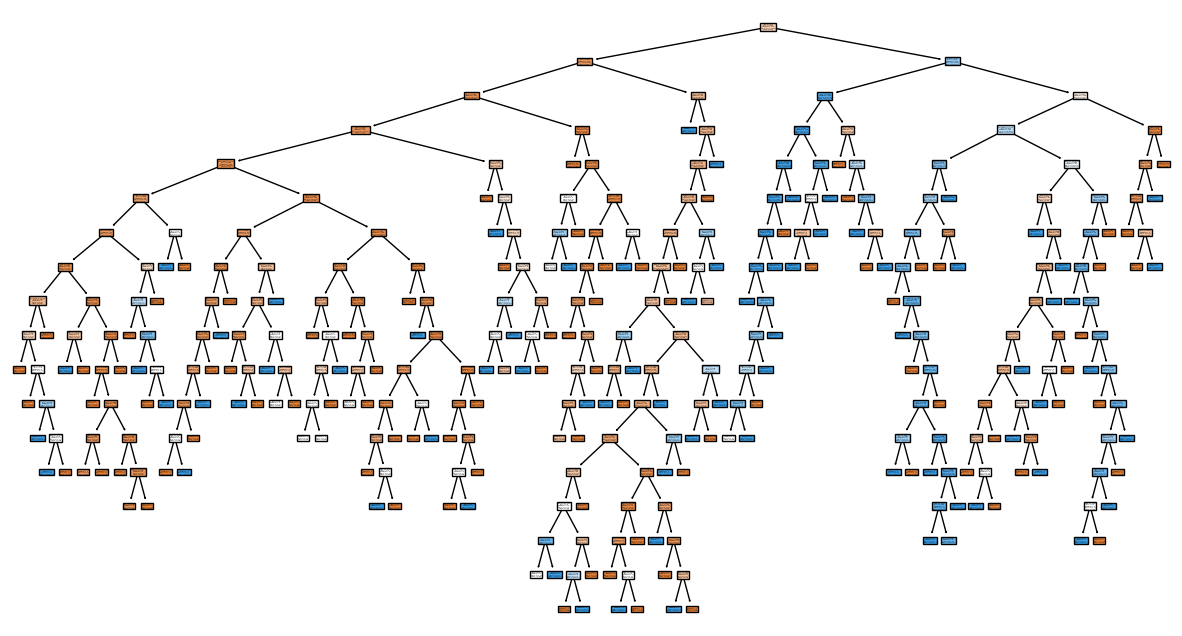

In [147]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=features, class_names=['Died', 'Survived'], filled=True)
plt.show()

# STEP 5: Predict on Test Data & Prepare Submission

In [129]:
# 1. Predict on test data
X_test = test_df[features]  # same feature list as training
test_predictions = rf_model.predict(X_test)

# 2. Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# 3. Export to CSV
submission.to_csv('titanic_submission.csv', index=False)

In [145]:
# Load the submission file
submission = pd.read_csv('titanic_submission.csv')

# Count the number of survived vs not survived
survival_counts = submission['Survived'].value_counts()

# Print results
print("Prediction Breakdown:")
print(survival_counts)
print("\nSurvived: {} | Did Not Survive: {}".format(survival_counts.get(1, 0), survival_counts.get(0, 0)))

Prediction Breakdown:
Survived
0    252
1    166
Name: count, dtype: int64

Survived: 166 | Did Not Survive: 252


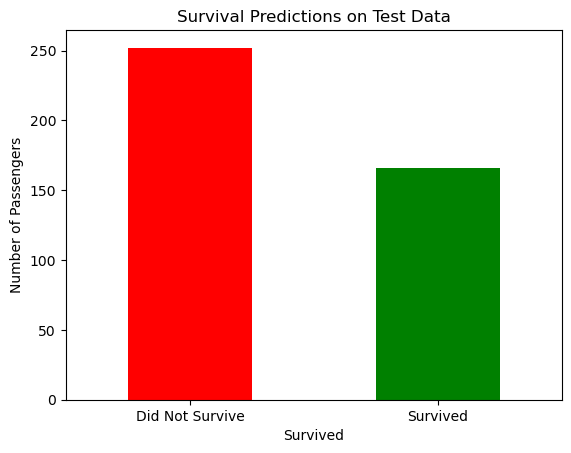

In [135]:
import matplotlib.pyplot as plt

survival_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Survival Predictions on Test Data')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'], rotation=0)
plt.ylabel('Number of Passengers')
plt.show()